In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [80]:
df_norm = pd.read_excel("mots_result.xlsx", sheet_name="normal")
df_haze = pd.read_excel("mots_result.xlsx", sheet_name="haze")
df = pd.concat([df_norm, df_haze])
df

,Model,Dataset,mMOTSA,mMOTSP,mIDF1
0,PCAN,Normal,27.8,66.9,44.9
1,UNICORN,Normal,28.1,67.2,44.5
0,PCAN,0.01,23.0 (-4.8),59.5 (-7.4),39.7 (-5.2)
1,PCAN,0.02,22.2 (-5.6),59.5 (-7.4),37.5 (-7.4)
2,PCAN,0.06,13.7 (-14.1),59.1 (-7.8),25.7 (-19.2)
3,UNICORN,0.01,27.2 (-0.9),67.4 (+0.2),43.4 (-1.1)
4,UNICORN,0.02,25.1 (-3.0),67.5 (+0.3),40.9 (-3.6)
5,UNICORN,0.06,19.8 (-8.3),67.0 (-0.2),33.6 (-10.9)


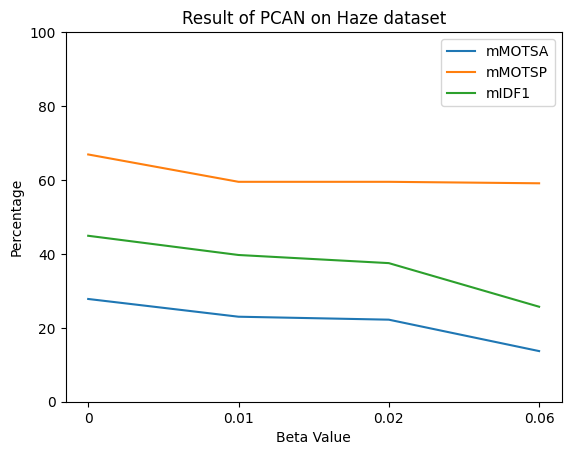

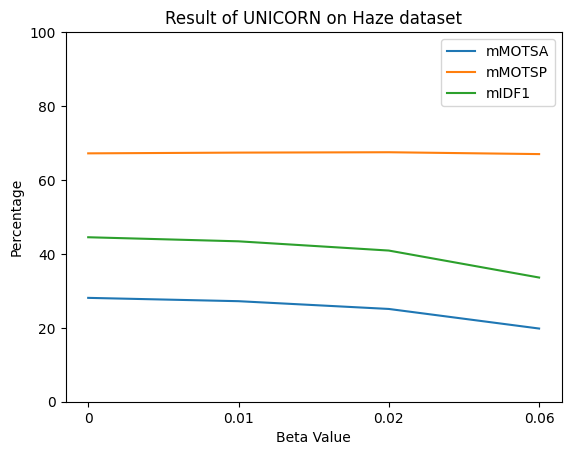

In [81]:
models = ["PCAN", "UNICORN"]
metrics = ["mMOTSA", "mMOTSP", "mIDF1"]
for model in models:
    for metric in metrics:
        target_df = df[df["Model"]==model][["Model", "Dataset", metric]]
        target_df["Dataset"] = target_df["Dataset"].astype(str)
        target_df[metric] = target_df[metric].astype(str).apply(lambda x:x.split("(")[0]).astype(float)
        plt.plot(target_df["Dataset"], target_df[metric], label=metric)
        plt.xlabel("Beta Value")
        plt.xticks(range(4), ["0", "0.01", "0.02", "0.06"])
        #plt.xticklabels(["0.01", "0.02", "0.06"])
        plt.ylabel("Percentage")
        plt.ylim(0,100)
        plt.title(f"Result of {model} on Haze dataset")
    plt.legend(loc="best")
    plt.savefig(f"{model}_haze")
    plt.show()

   mMOTSA  mMOTSP  mIDF1 Dataset
0    -4.8    -5.6  -14.1    0.01
1    -7.4    -7.4   -7.8    0.02
2    -5.2    -7.4  -19.2    0.06
   mMOTSA  mMOTSP  mIDF1 Dataset
0    -0.9    -3.0   -8.3    0.01
1     0.2     0.3   -0.2    0.02
2    -1.1    -3.6  -10.9    0.06


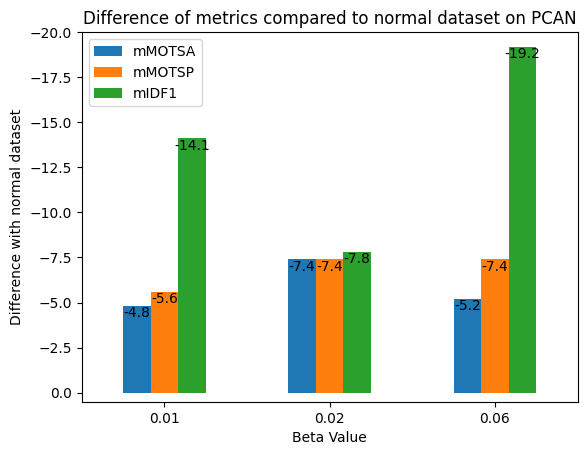

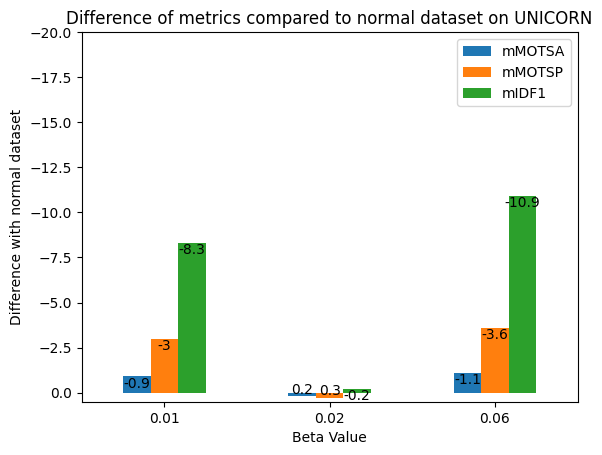

In [82]:
# make haze barchart
betas = [0.01, 0.02, 0.06]
for model in models:
    temp = []
    for metric in metrics:
        temp2 = []
        for beta in betas:
            target_df = df_haze[(df_haze["Model"]==model) & (df_haze["Dataset"]==beta)][[metric]]
            target_df[metric] = target_df[metric].astype(str).apply(lambda x:x.split("(")[1].split(")")[0]).astype(float)
            temp2.append(target_df.values[0][0])
        temp.append(temp2)
    df = pd.DataFrame(temp, columns=metrics)
    df["Dataset"] = ["0.01", "0.02", "0.06"]
    ax = df.plot(x="Dataset", y=metrics, kind="bar")
    for container in ax.containers:
        ax.bar_label(container)
    ax.invert_yaxis()
    ax.set_ylim(0.5,-20)
    ax.set_ylabel("Difference with normal dataset")
    ax.set_xlabel("Beta Value")
    plt.title(f"Difference of metrics compared to normal dataset on {model}")
    plt.xticks(rotation=0)
    plt.savefig(f"{model}_haze_diff")
    print(df)

In [83]:
df_pcan_dehaze = []
model = "PCAN"
for beta in betas:
    str_beta = str(beta).replace(".", "")
    temp_df = pd.read_excel("mots_result.xlsx", sheet_name=f"{str_beta}_dehaze_PCAN")
    temp_df = pd.concat([df_haze[(df_haze["Model"]==model) & (df_haze["Dataset"]==beta)], temp_df])
    temp_df = pd.concat([df_norm[df_norm["Model"]==model], temp_df])
    df_pcan_dehaze.append(temp_df)

In [84]:
df_unicorn_dehaze = []
model = "UNICORN"
for beta in betas:
    str_beta = str(beta).replace(".", "")
    temp_df = pd.read_excel("mots_result.xlsx", sheet_name=f"{str_beta}_dehaze_UNICORN")
    temp_df = pd.concat([df_haze[(df_haze["Model"]==model) & (df_haze["Dataset"]==beta)], temp_df])
    temp_df = pd.concat([df_norm[df_norm["Model"]==model], temp_df])
    df_unicorn_dehaze.append(temp_df)

In [85]:
def get_val(x):
    try:
        return x.split("(")[0].split(")")[0].replace("+","")
    except:
        return x

In [86]:
for i in range(3):
    df_pcan_dehaze[i]["mMOTSA"] = df_pcan_dehaze[i]["mMOTSA"].astype(str).apply(get_val).astype(float)
    df_pcan_dehaze[i]["mMOTSP"] = df_pcan_dehaze[i]["mMOTSP"].astype(str).apply(get_val).astype(float)
    df_pcan_dehaze[i]["mIDF1"] = df_pcan_dehaze[i]["mIDF1"].astype(str).apply(get_val).astype(float)

In [87]:
for i in range(3):
    df_unicorn_dehaze[i]["mMOTSA"] = df_unicorn_dehaze[i]["mMOTSA"].astype(str).apply(get_val).astype(float)
    df_unicorn_dehaze[i]["mMOTSP"] = df_unicorn_dehaze[i]["mMOTSP"].astype(str).apply(get_val).astype(float)
    df_unicorn_dehaze[i]["mIDF1"] = df_unicorn_dehaze[i]["mIDF1"].astype(str).apply(get_val).astype(float)

In [88]:
df_pcan_dehaze[0]

,Model,Dataset,mMOTSA,mMOTSP,mIDF1
0,PCAN,Normal,27.8,66.9,44.9
0,PCAN,0.01,23.0,59.5,39.7
0,PCAN,MSBDN,25.8,66.8,42.6
1,PCAN,Dehamer,25.2,67.3,42.3
2,PCAN,Dehamer indoor,24.1,65.9,41.2
3,PCAN,DCP,25.5,67.1,42.8


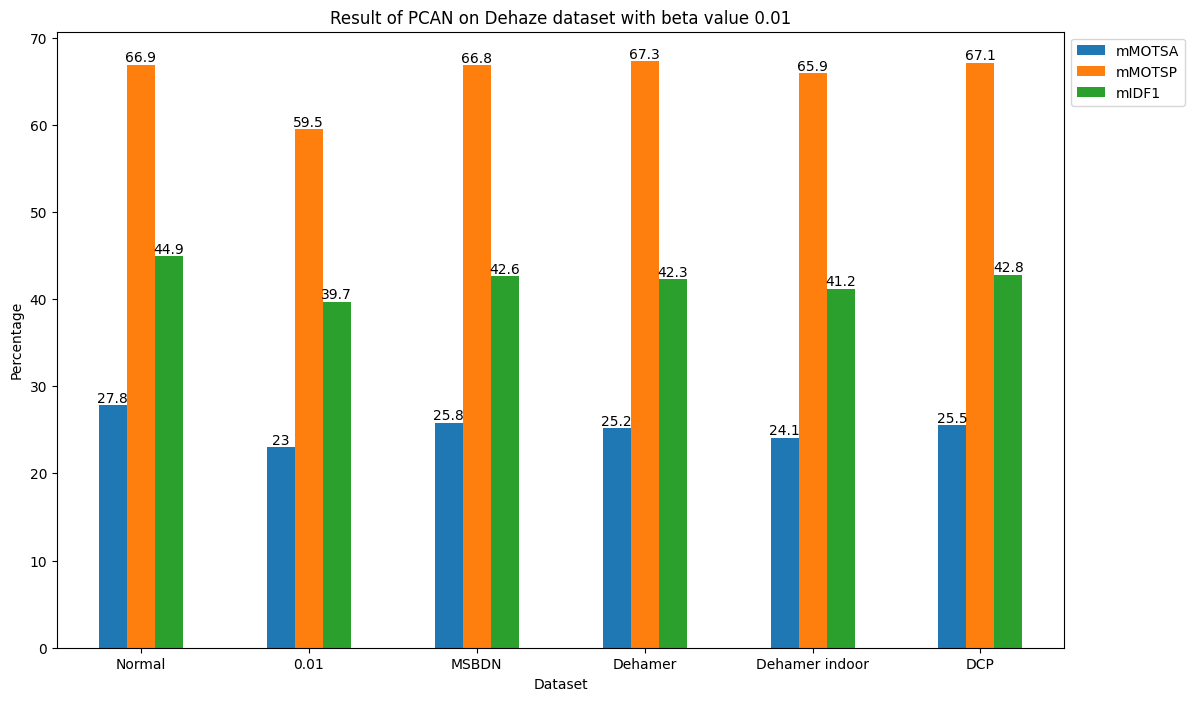

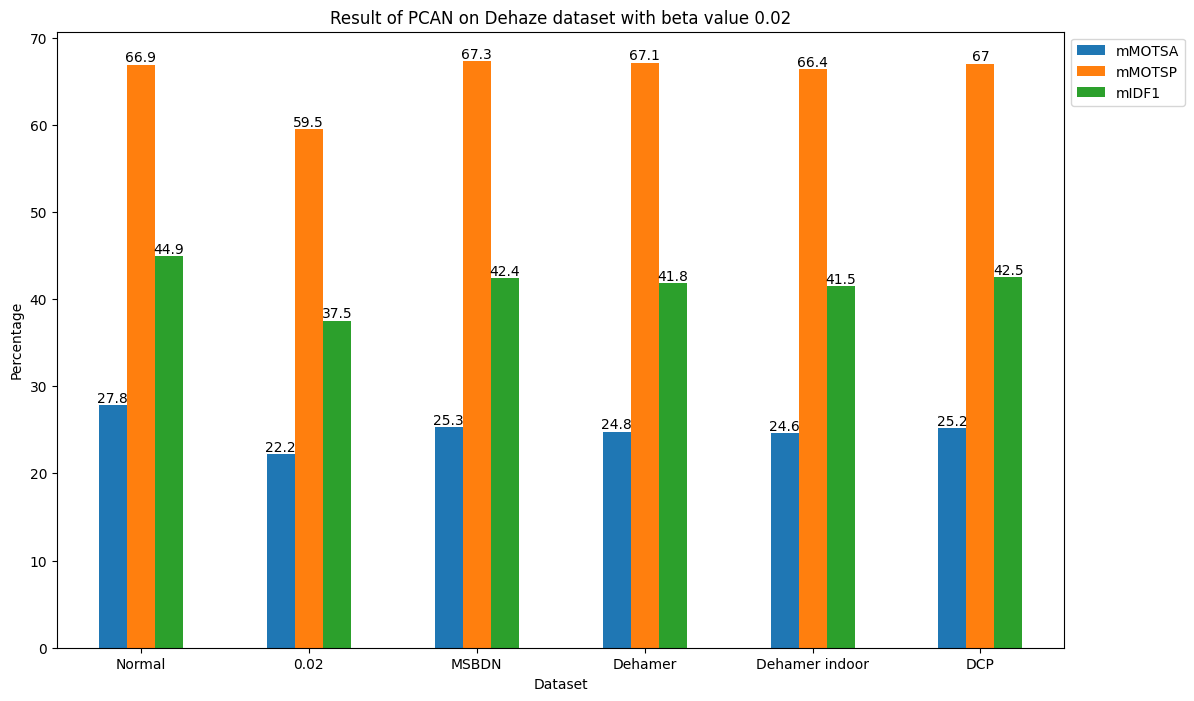

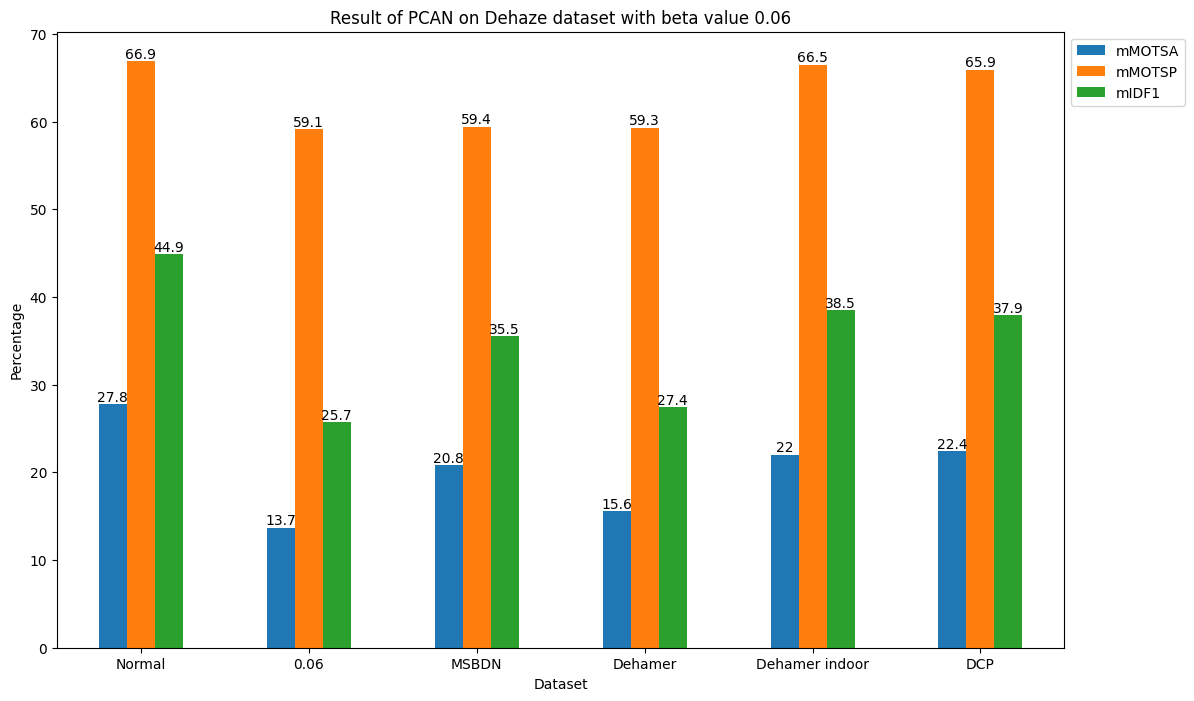

In [89]:
model = "PCAN"
for i in range(3):
    str_beta = str(betas[i])
    df = df_pcan_dehaze[i][["Dataset"]+metrics]
    ax = df.plot(x="Dataset", y=metrics, kind="bar", figsize=(13, 8))
    #ax.invert_yaxis()
    #ax.set_ylim(0.5,-20)
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Dataset")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Result of {model} on Dehaze dataset with beta value {str_beta}")
    plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
    plt.xticks(rotation=0)
    plt.savefig(f"PCAN_{str_beta}_dehaze.png")

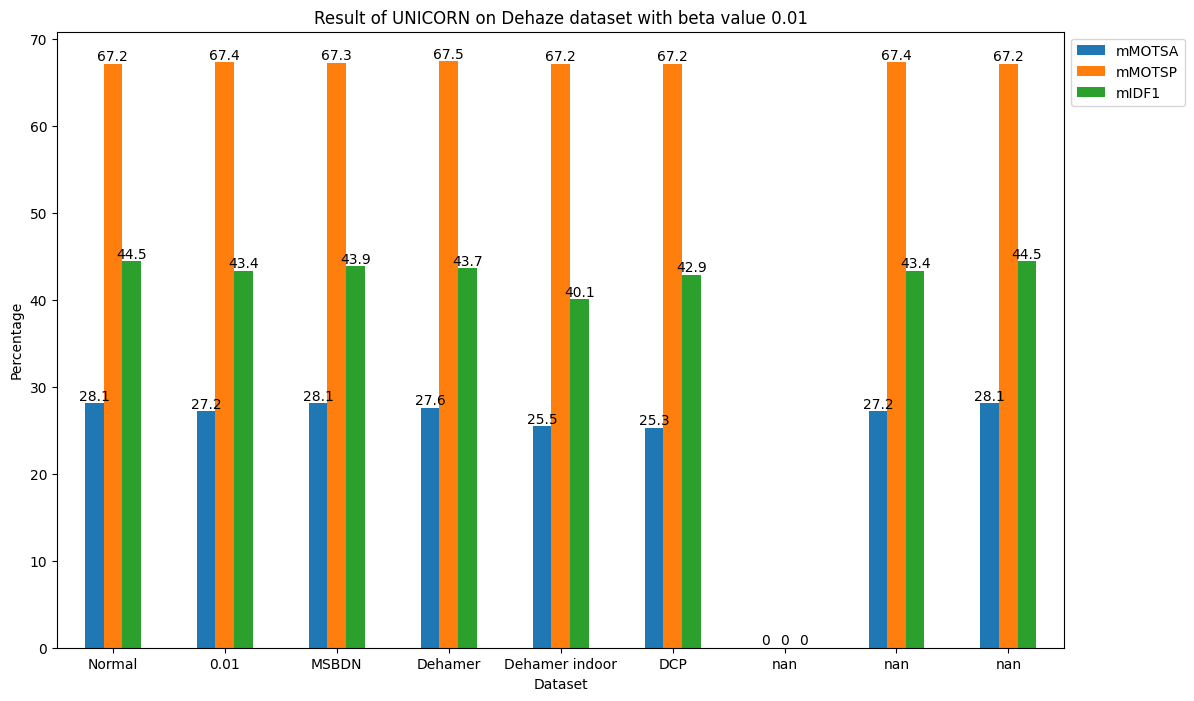

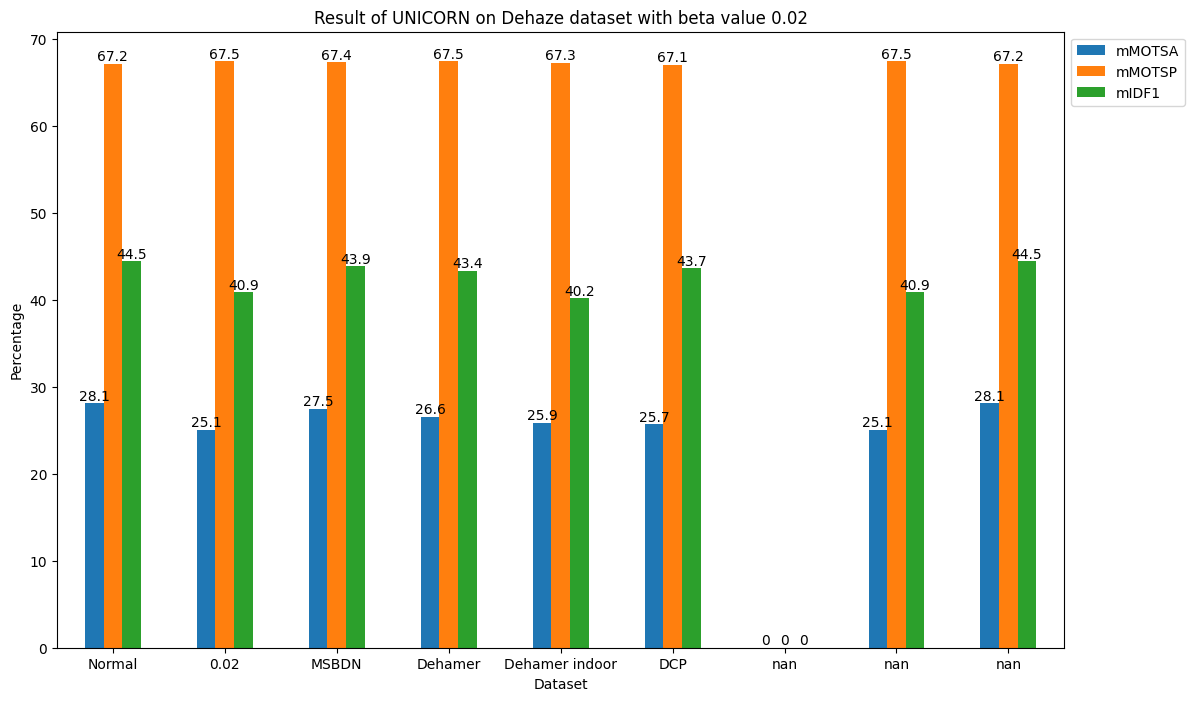

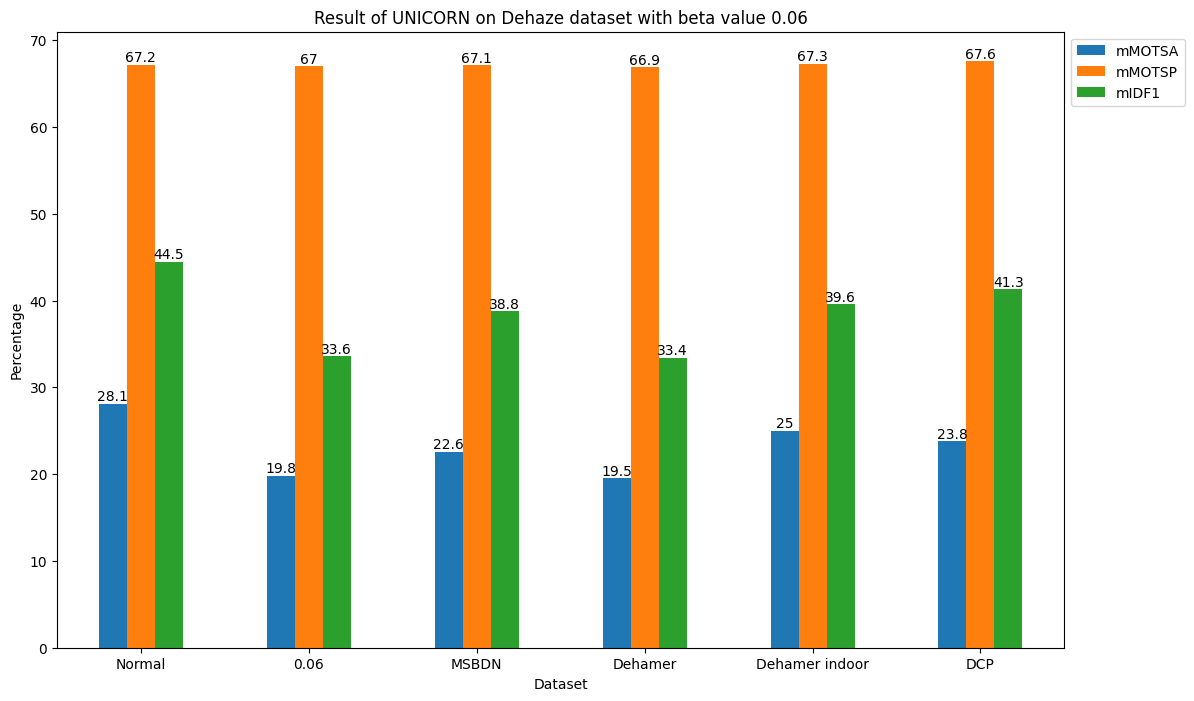

In [90]:
model = "UNICORN"
for i in range(3):
    str_beta = str(betas[i])
    df = df_unicorn_dehaze[i][["Dataset"]+metrics]
    ax = df.plot(x="Dataset", y=metrics, kind="bar", figsize=(13, 8))
    #ax.invert_yaxis()
    #ax.set_ylim(0.5,-20)
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Dataset")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Result of {model} on Dehaze dataset with beta value {str_beta}")
    plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
    plt.xticks(rotation=0)
    plt.savefig(f"UNICORN_{str_beta}_dehaze.png")